show the dirctoris in train

In [1]:
#see contents of train file
!ls "/home/aninda/Desktop/V2_Plant_Seedling_Classification/V2_Plant_Seedling_Dataset"


 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherd’s Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'


In [ ]:
import shutil

shutil.rmtree("/home/aninda/Desktop/V2_Plant_Seedling_Classification/V2_Plant_Seedling_Dataset/nonsegmentedv2")

In [ ]:
#change dirctory 
#import os 
#os.chdir("train")
#cwd = os.getcwd()


In [2]:
#list of useful imports that  I will use

import os

import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns


In [ ]:
#save the path into variable to use it easily next times.
TRAIN_DATA_FOLDER= "/home/aninda/Desktop/V2_Plant_Seedling_Classification/V2_Plant_Seedling_Dataset"

 **Read images and remove missing values** 
 save images in **images** list

In [ ]:
images = []
classes=[]
missing=0
for class_folder_name in os.listdir(TRAIN_DATA_FOLDER):
    class_folder_path = os.path.join(TRAIN_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missig value ignore it
          missing += 1
          continue
        images.append(image_bgr)
        
        classes.append(class_label)

    

print("Done")
        

Done


number of all images

In [5]:
len(images)

5539

**resizing images**

In [6]:
def resize_images(img):

  img = np.array(img).astype(np.uint8)
  #print(img.dtype)
  res = cv2.resize(img,(256,256), interpolation = cv2.INTER_CUBIC)
  return res
#resized=[]
#for image in images:
#  ressized= resize_images(images[image])

In [7]:
#save resized images into images.
images = [resize_images(img) for img in images]
print("Done")

Done


In [9]:
images[0].shape

(256, 256, 3)

#number of images in each class 

In [10]:
#see number of images in each lablel
images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
#for key,value in images_per_class.items():
   # print("number of {0} images is  -> {1}".format(key, len(value)))
  
for label in set(classes):

  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))
        
  


images shape:  (5539, 256, 256, 3)
classes shape:  (5539,)
number of Cleavers images is  -> 335
number of Loose Silky-bent images is  -> 762
number of Black-grass images is  -> 309
number of Shepherd’s Purse images is  -> 274
number of Scentless Mayweed images is  -> 607
number of Small-flowered Cranesbill images is  -> 576
number of Charlock images is  -> 452
number of Fat Hen images is  -> 538
number of Maize images is  -> 257
number of Common Chickweed images is  -> 713
number of Sugar beet images is  -> 463
number of Common wheat images is  -> 253


# plot the distrbution of number of images

Text(0.5, 0.98, 'Categorical Plotting')

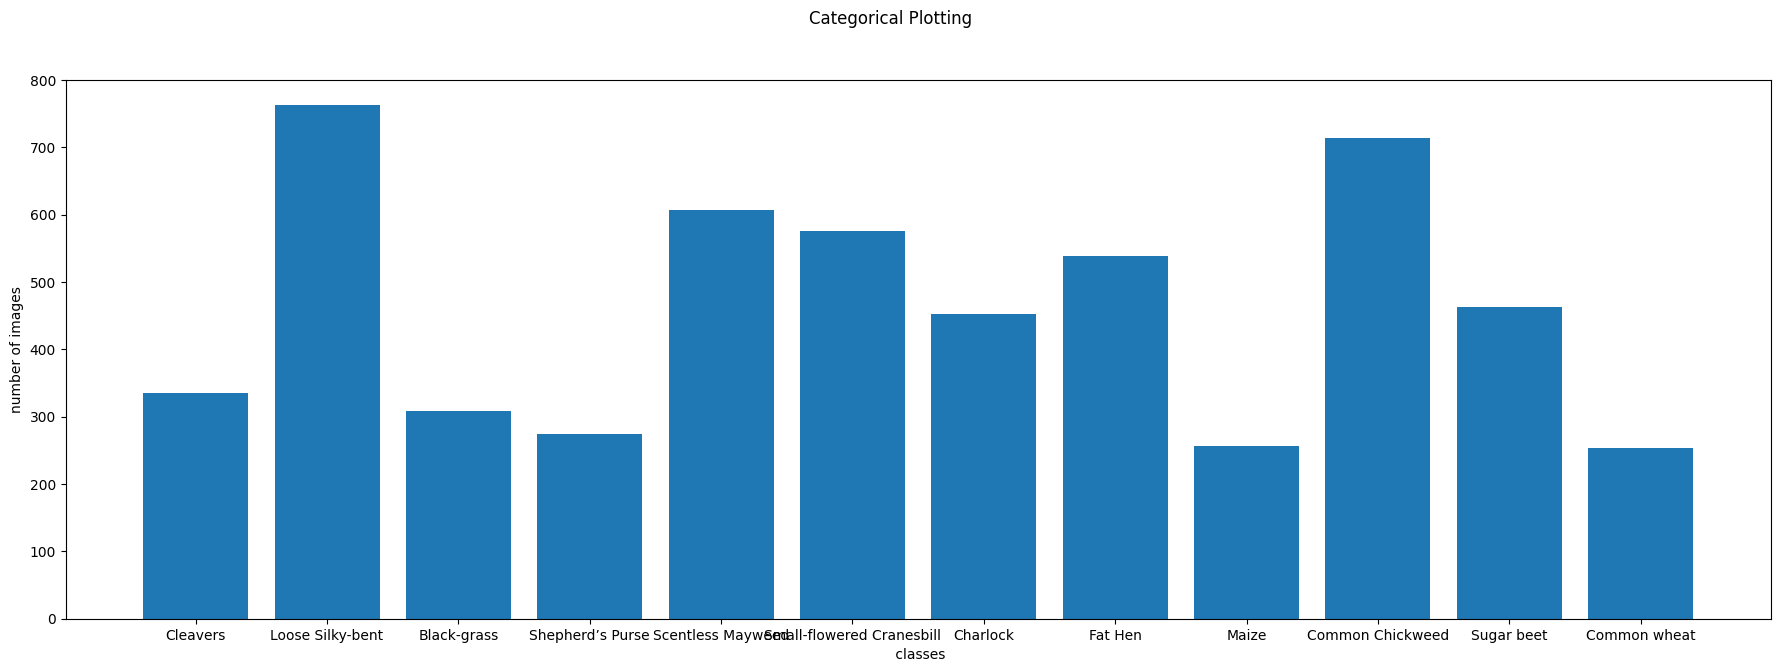

In [11]:
values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

# look at image after resize

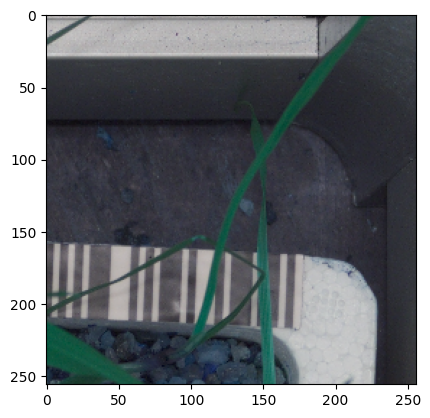

In [12]:
plt.imshow(images[50])


# data Exploration  

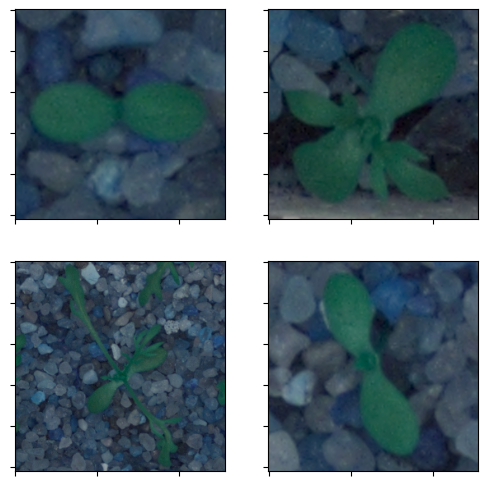

In [13]:
def plot_for_class(label):
    nb_rows = 2
    nb_cols = 2
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))
    class_images =images[classes== label]
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(class_images[n])
            n += 1 
plot_for_class("Scentless Mayweed")

In [14]:
#!ls "train/Scentless Mayweed" 1300c3cd9.png

img = cv2.imread("/home/aninda/Desktop/V2_Plant_Seedling_Classification/V2_Plant_Seedling_Dataset/Scentless Mayweed/21.png")


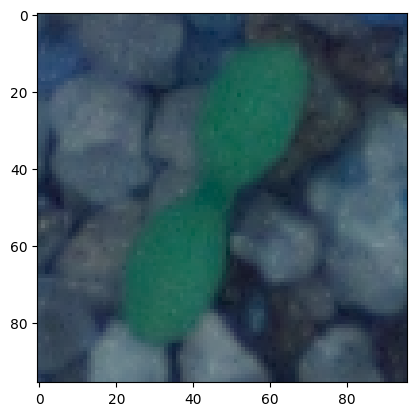

In [15]:
plt.imshow(img)

#Apply image processing on the images 
* convert image from RGB to HSV 
* Apply closing opration(one of mophological opration)
* Apply segmentation 
* Apply sharpening 

In [16]:
def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp



# put all those functions together.

In [17]:
def segment(img):

  #image_mask = create_mask_for_plant(img)
  image_segmented = segment_plant(img)
  image_sharpen = sharpen_image(image_segmented)
  return image_sharpen

# itrate on all images

In [18]:
for indx, image in enumerate(images):
  try:
     images[indx] = segment(image)
      
  except:
    print(indx)
    continue
      
    
  

# plot sample image to see diffrence before and after

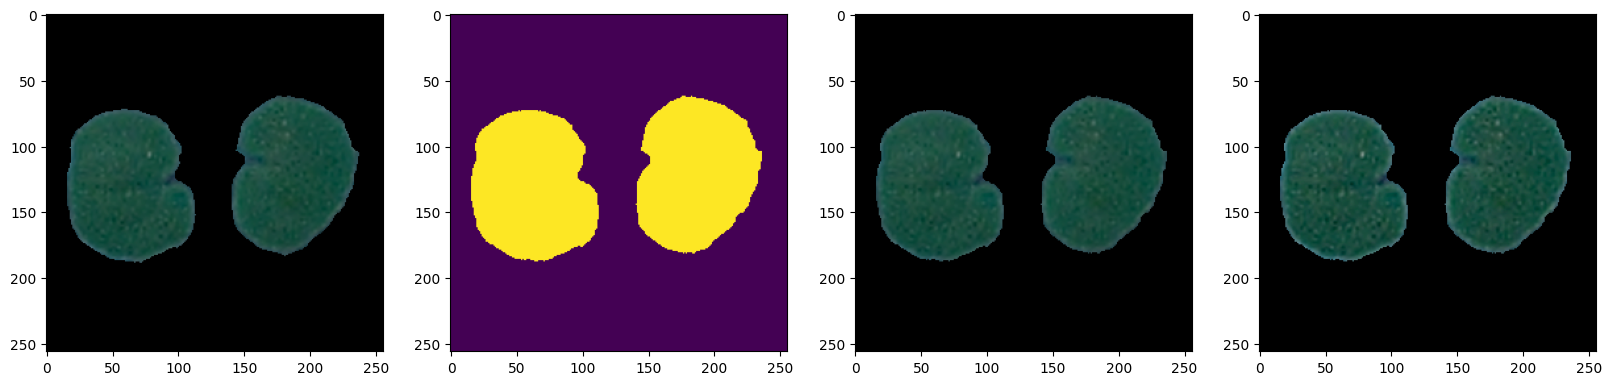

In [19]:
image = images[classes == "Small-flowered Cranesbill"][40]

image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)

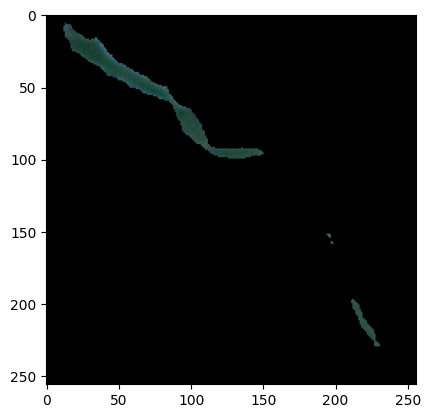

In [20]:
plt.imshow(images[0])

In [21]:
images.shape

(5539, 256, 256, 3)

# Label encoder 

In [22]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(classes)

In [23]:
y[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Spliting data into training and testing set
* training set : 70%

*  testing set: 30% 

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=50)

In [25]:
X_train.shape


(3877, 256, 256, 3)

# Create validarion set 
* split test data into 50% test, 50% validation

In [26]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [27]:
print(X_test.shape)
print(X_val.shape)

(831, 256, 256, 3)
(831, 256, 256, 3)



#Custom CNN MODEL 


In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

# CNN Model
model = Sequential()

# Use input_shape instead of batch_input_shape
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same',
                 activation='relu', input_shape=(256, 256, 3)))

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))

model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(12, activation='softmax'))

model.summary()


2025-07-15 12:14:02.520082: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-15 12:14:02.627829: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-15 12:14:02.630970: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aninda/anaconda3/envs/seedlings/lib/python3.10/site-packages/cv2/../../lib64:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      36928     
                                                        

2025-07-15 12:14:03.841697: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aninda/anaconda3/envs/seedlings/lib/python3.10/site-packages/cv2/../../lib64:
2025-07-15 12:14:03.841757: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aninda/anaconda3/envs/seedlings/lib/python3.10/site-packages/cv2/../../lib64:
2025-07-15 12:14:03.841795: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/aninda/anaconda3/envs/seedlings/lib/python3.10/

In [30]:
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

/home/aninda/anaconda3/envs/seedlings/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/home/aninda/anaconda3/envs/seedlings/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [31]:
from sklearn.utils import class_weight
import numpy as np
from keras.callbacks import ModelCheckpoint

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(np.argmax(y_train, axis=1)),
    y=np.argmax(y_train, axis=1)
)

# Convert to dictionary format for Keras
class_weights_dict = dict(enumerate(class_weights))

# Callback to save the best model
checkpoint = ModelCheckpoint(
    filepath='plant_seedlings_best_model_cw.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

batch_size = 32

# Train the model with class weights
model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_val, Y_val),
    batch_size=batch_size,
    callbacks=[checkpoint],
    class_weight=class_weights_dict
)


Epoch 1/50
122/122 [==============================] - ETA: 0s - loss: 2.9661 - accuracy: 0.0913
Epoch 1: val_accuracy improved from -inf to 0.10710, saving model to plant_seedlings_best_model_cw.h5
122/122 [==============================] - 95s 774ms/step - loss: 2.9661 - accuracy: 0.0913 - val_loss: 2.4703 - val_accuracy: 0.1071
Epoch 2/50
122/122 [==============================] - ETA: 0s - loss: 2.3466 - accuracy: 0.1625
Epoch 2: val_accuracy improved from 0.10710 to 0.21540, saving model to plant_seedlings_best_model_cw.h5
122/122 [==============================] - 94s 774ms/step - loss: 2.3466 - accuracy: 0.1625 - val_loss: 2.1611 - val_accuracy: 0.2154
Epoch 3/50
122/122 [==============================] - ETA: 0s - loss: 2.1844 - accuracy: 0.2040
Epoch 3: val_accuracy improved from 0.21540 to 0.27316, saving model to plant_seedlings_best_model_cw.h5
122/122 [==============================] - 94s 773ms/step - loss: 2.1844 - accuracy: 0.2040 - val_loss: 2.1458 - val_accuracy: 0.273

In [36]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5331147909164429
Test accuracy: 0.81107097864151


In [37]:
X_test.shape

(831, 256, 256, 3)

In [38]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 30
batch_size = 32

# **Data augmentation **

In [39]:
from keras.preprocessing.image import ImageDataGenerator

# Data augmentation setup
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

# Fit the generator to the training data
datagen.fit(X_train)


In [40]:
from sklearn.utils.class_weight import compute_class_weight
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import numpy as np

# Compute class weights
y_integers = np.argmax(y_train, axis=1)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_integers),
    y=y_integers
)
class_weights = dict(enumerate(class_weights))

# Define callbacks
checkpoint = ModelCheckpoint(
    filepath='plant_seedlings_best_model_cw_aug.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    mode='max',
    verbose=1
)

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=1e-6
)

# Training the model with data generator and class weights
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=30,
    validation_data=(X_val, Y_val),
    steps_per_epoch=X_train.shape[0] // batch_size,
    class_weight=class_weights,
    callbacks=[checkpoint, learning_rate_reduction],
    verbose=2
)


Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.55836, saving model to plant_seedlings_best_model_cw_aug.h5
121/121 - 187s - loss: 0.8202 - accuracy: 0.7225 - val_loss: 1.3366 - val_accuracy: 0.5584 - lr: 0.0010 - 187s/epoch - 2s/step
Epoch 2/50

Epoch 2: val_accuracy did not improve from 0.55836
121/121 - 179s - loss: 0.8181 - accuracy: 0.7202 - val_loss: 1.4423 - val_accuracy: 0.5247 - lr: 0.0010 - 179s/epoch - 1s/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.55836 to 0.60048, saving model to plant_seedlings_best_model_cw_aug.h5
121/121 - 172s - loss: 0.8455 - accuracy: 0.7147 - val_loss: 1.3704 - val_accuracy: 0.6005 - lr: 0.0010 - 172s/epoch - 1s/step
Epoch 4/50

Epoch 4: val_accuracy improved from 0.60048 to 0.67268, saving model to plant_seedlings_best_model_cw_aug.h5
121/121 - 145s - loss: 0.7934 - accuracy: 0.7238 - val_loss: 0.8802 - val_accuracy: 0.6727 - lr: 0.0010 - 145s/epoch - 1s/step
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.67268
121/12

In [41]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.570984959602356
Test accuracy: 0.7942238450050354


# Model Evaluation

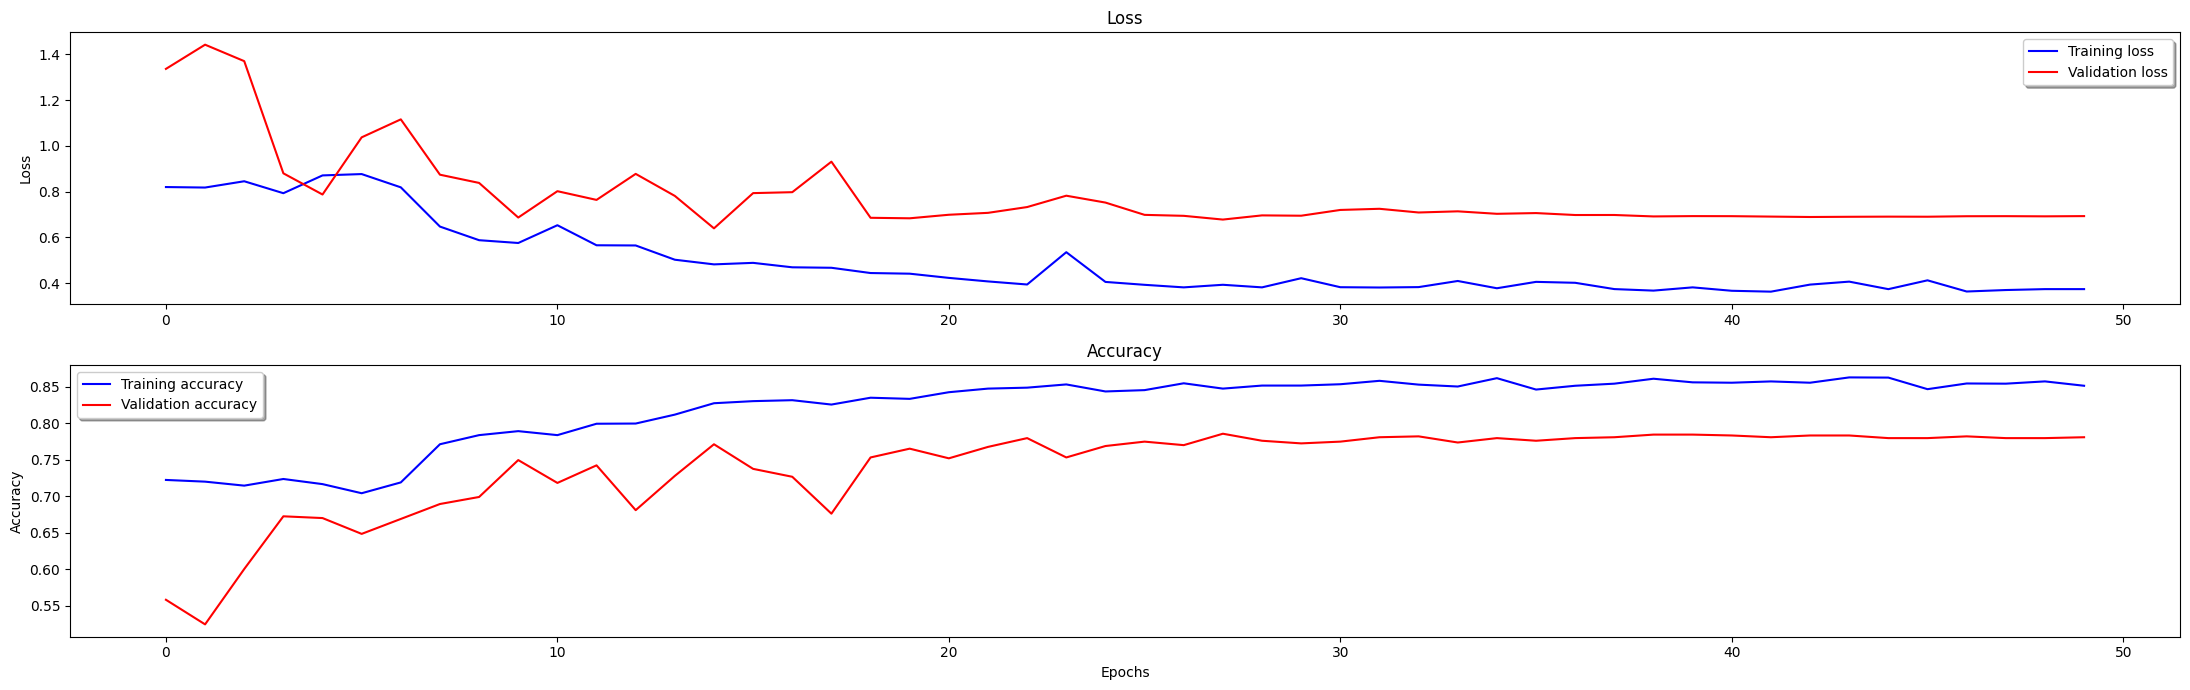

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(22, 7))

# Loss
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title("Loss")
ax[0].set_ylabel("Loss")

# Accuracy
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title("Accuracy")
ax[1].set_ylabel("Accuracy")

plt.xlabel("Epochs")
plt.tight_layout()


# Save the plot before showing
plt.savefig('my_plot.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution



plt.show()


In [43]:
#prediction = model.predict(X_test)

# Confusion Matrix

26/26 [==============================] - 6s 231ms/step


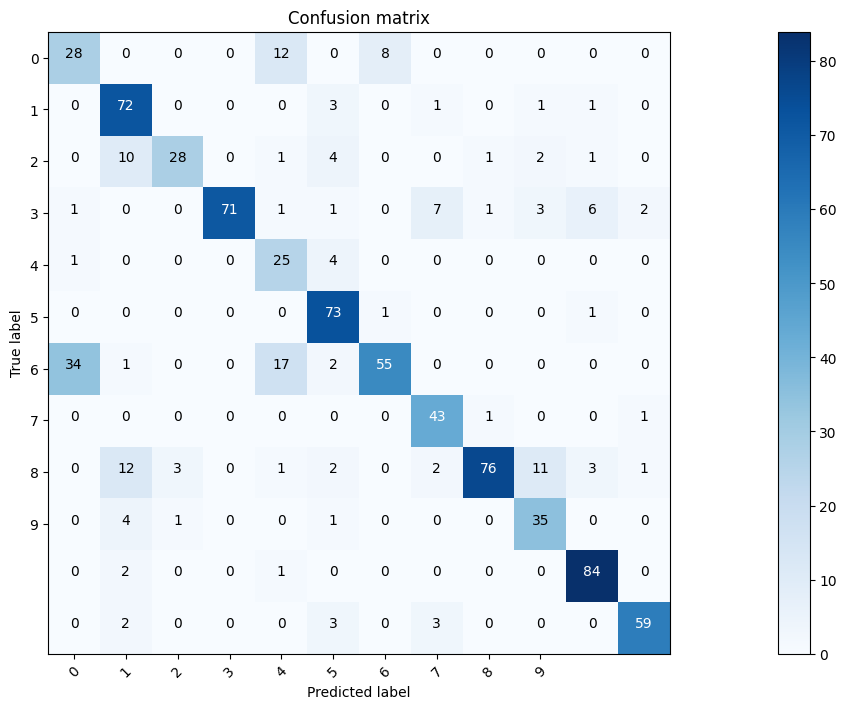

In [44]:
from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

1/1 [==============================] - 0s 51ms/step
Predicted class: Black-grass
Actual class: Loose Silky-bent


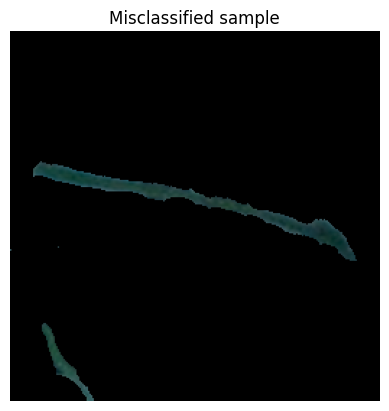

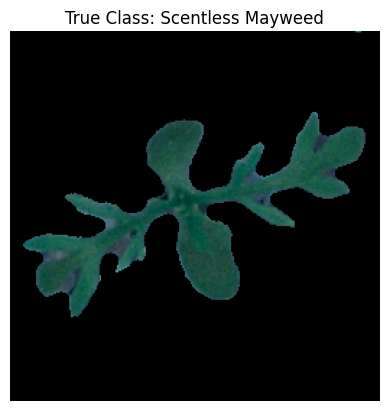

In [45]:
# Predict class indices from the test set
Predicted_classes = np.argmax(model.predict(X_test), axis=1)

# Convert one-hot test labels to class indices
y_test_labels = np.argmax(y_test, axis=1)

# Identify wrong predictions
wrong_preds_indices = np.where(Predicted_classes != y_test_labels)[0]
wrong_preds = X_test[wrong_preds_indices]

# Pick one misclassified sample to visualize
i = 10  # You can choose any index < len(wrong_preds)
sample = wrong_preds[i]

# Predict on the chosen sample
pred = np.argmax(model.predict(sample.reshape(1, 256, 256, 3)), axis=1)[0]
act = y_test_labels[wrong_preds_indices[i]]

print("Predicted class:", enc.classes_[pred])
print("Actual class:", enc.classes_[act])

plt.imshow(sample)
plt.title("Misclassified sample")
plt.axis('off')
plt.show()

# Show a correctly classified example
plt.imshow(X_test[10])
true_label = enc.inverse_transform(y_test[10].reshape(1, -1))[0]
plt.title(f"True Class: {true_label}")
plt.axis('off')
plt.show()


In [46]:
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# ---- Predict probabilities and classes ----
y_probs = model.predict(X_test)                      # shape: (n_samples, 12)
y_pred = np.argmax(y_probs, axis=1)                  # predicted class indices
y_true = np.argmax(y_test, axis=1)                   # actual class indices

# ---- Classification Report ----
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=enc.classes_))


26/26 [==============================] - 6s 231ms/step
Classification Report:

                           precision    recall  f1-score   support

              Black-grass       0.31      0.52      0.39        33
                 Charlock       0.69      0.94      0.79        62
                 Cleavers       0.88      0.78      0.83        58
         Common Chickweed       0.99      0.71      0.83       115
             Common wheat       0.69      0.91      0.79        45
                  Fat Hen       0.83      0.94      0.88        84
         Loose Silky-bent       0.82      0.52      0.63        97
                    Maize       0.82      0.95      0.88        42
        Scentless Mayweed       0.98      0.67      0.80        86
         Shepherd’s Purse       0.56      0.82      0.67        50
Small-flowered Cranesbill       0.90      0.99      0.94        88
               Sugar beet       0.95      0.87      0.91        71

                 accuracy                       

26/26 [==============================] - 6s 229ms/step


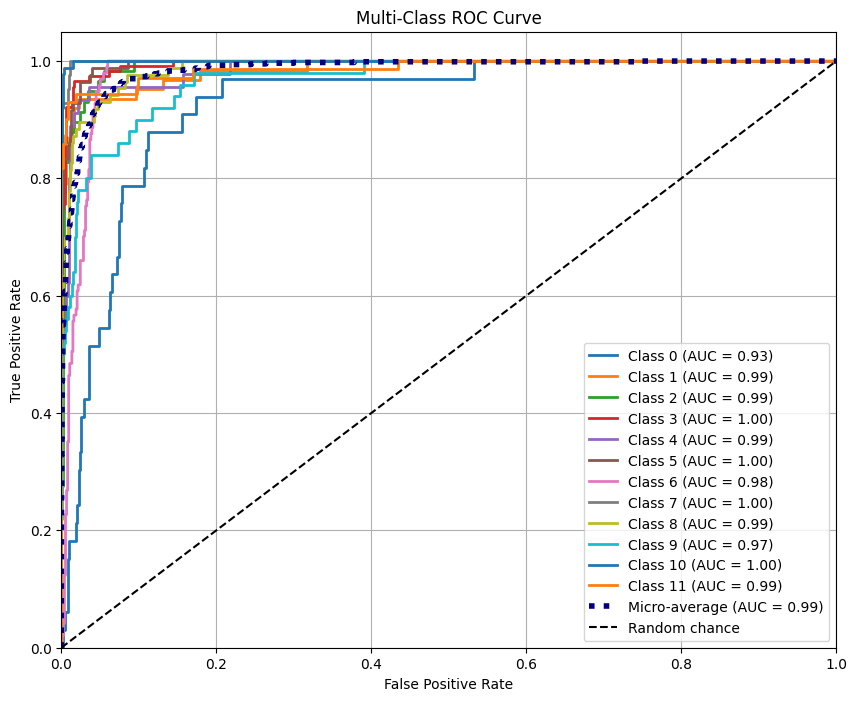

In [47]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Binarize the labels (one-hot encoded if not already)
y_test_bin = label_binarize(np.argmax(y_test, axis=1), classes=np.arange(12))
y_pred_prob = model.predict(X_test)  # Predict probabilities

# Step 2: Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 3: Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Step 4: Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average (AUC = {:.2f})'.format(roc_auc["micro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', label='Random chance')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
